# **Sentiment Analysis with Online Products Reviews**

En este notebook, se utilizó el dataset "Grammar and Online Product Reviews" de Kaggle con el objetivo de clasificar reseñas de productos en base al sentimiento que se expresa en ella. Además, se calcula una puntuación para determinar la carga positiva o negativa de la reseña, para así determinar los mejores y peores productos y productores.

**Authors:**
- [Andrea Ramirez](https://github.com/Andrea-gt)
- [Adrian Flores](https://github.com/adrianRFlores)

***

## **(1) Import Libraries** ⬇️

In [312]:
#!pip install unidecode

In [313]:
#!pip install nlpaug

In [314]:
#!pip install wordcloud

In [315]:
#!pip install nltk

In [316]:
# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, skew, probplot
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import itertools
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from unidecode import unidecode
from google.colab import files
from collections import Counter

# Standard libraries
import warnings
warnings.filterwarnings('ignore')

# ===== ===== Reproducibility Seed ===== =====
# Set a fixed seed for the random number generator for reproducibility
random_state = 42

# Set matplotlib inline
%matplotlib inline

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)

# Define custom color palette
palette = sns.color_palette("viridis", 12)

# Set the style of seaborn
sns.set(style="whitegrid")

## **(2) Data Upload** 📄

In [317]:
df = pd.read_csv('reviews.csv')
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


## **(3) Exploratory Analysis** 🔎

### **(1) Descripción General de los Datos**

In [318]:
# Print the number of records in the DataFrame
print("The given dataset has", df.shape[0], "registers and", df.shape[1], "columns.")

The given dataset has 71044 registers and 25 columns.


**Observaciones 💡 -->**

> - El conjunto de datos original cuenta con 71044 registros y 25 columnas, lo que indica que tiene una dimensión relativamente grande. Cada uno de los 71044 registros representa una observación única, mientras que las 25 columnas corresponden a diferentes características o variables del producto, del usuario y de la reseña como tal.

**Fuente:** [Página oficial de Kaggle](https://www.kaggle.com/datasets/datafiniti/grammar-and-online-product-reviews)

In [319]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

Como se puede observar, se cuentan con 25 columnas o features en este conjunto de datos, siendo estas las que se describen a continuación.

- **id**: un identificador único para cada producto.
- **brand**: marca del producto.
- **categories**: categorías a las que pertenece el producto.
- **dateAdded**: fecha en que el producto fue añadido al sistema.
- **dateUpdated**: fecha de la última actualización de la información del producto.
- **ean**: código de artículo europeo (European Article Number), un identificador único para el producto.
- **keys**: palabras clave relacionadas con el producto.
- **manufacturer**: nombre del fabricante del producto.
- **manufacturerNumber**: número asignado por el fabricante para identificar el producto.
- **name**: nombre del producto.
- **reviews.date**: fecha de la reseña.
- **reviews.dateAdded**: fecha en que la reseña fue añadida al sistema.
- **reviews.dateSeen**: fecha en que se visualizó la reseña.
- **reviews.didPurchase**: indica si el usuario que dejó la reseña compró el producto (sí o no).
- **reviews.doRecommend**: indica si el usuario recomienda el producto (sí o no).
- **reviews.id**: un identificador único para cada reseña.
- **reviews.numHelpful**: número de personas que encontraron útil la reseña.
- **reviews.rating**: calificación numérica otorgada al producto en la reseña (por ejemplo, 1 a 5 estrellas).
- **reviews.sourceURLs**: URL de la fuente de la reseña.
- **reviews.text**: texto de la reseña escrita por el usuario.
- **reviews.title**: título de la reseña.
- **reviews.userCity**: ciudad del usuario que dejó la reseña.
- **reviews.userProvince**: provincia del usuario que dejó la reseña.
- **reviews.username**: nombre de usuario o alias de quien dejó la reseña.
- **upc**: código universal de producto (Universal Product Code), un identificador único para el producto.

### **(2) Clasificación de las Variables**

| **Nombre**               | **Descripción**                                                               | **Tipo de variable**                     |
|--------------------------|-------------------------------------------------------------------------------|------------------------------------------|
| **id**                   | Un identificador único para cada producto                                     | Cuantitativa                             |
| **brand**                | Marca del producto                                                            | Cualitativa (descriptiva)                |
| **categories**           | Categorías a las que pertenece el producto                                    | Cualitativa (descriptiva)                |
| **dateAdded**            | Fecha en que el producto fue añadido al sistema                               | Cualitativa (tiempo)                     |
| **dateUpdated**          | Fecha de la última actualización de la información del producto               | Cualitativa (tiempo)                     |
| **ean**                  | Código de artículo europeo (EAN), un identificador único para el producto      | Cualitativa (descriptiva)                |
| **keys**                 | Palabras clave relacionadas con el producto                                   | Cualitativa (descriptiva)                |
| **manufacturer**         | Nombre del fabricante del producto                                            | Cualitativa (descriptiva)                |
| **manufacturerNumber**   | Número asignado por el fabricante para identificar el producto                | Cualitativa (descriptiva)                |
| **name**                 | Nombre del producto                                                           | Cualitativa (descriptiva)                |
| **reviews.date**         | Fecha de la reseña                                                            | Cualitativa (tiempo)                     |
| **reviews.dateAdded**    | Fecha en que la reseña fue añadida al sistema                                 | Cualitativa (tiempo)                     |
| **reviews.dateSeen**     | Fecha en que se visualizó la reseña                                           | Cualitativa (tiempo)                     |
| **reviews.didPurchase**  | Indica si el usuario que dejó la reseña compró el producto (sí o no)           | Cualitativa (binaria)                    |
| **reviews.doRecommend**  | Indica si el usuario recomienda el producto (sí o no)                          | Cualitativa (binaria)                    |
| **reviews.id**           | Un identificador único para cada reseña                                       | Cuantitativa                             |
| **reviews.numHelpful**   | Número de personas que encontraron útil la reseña                             | Cuantitativa                             |
| **reviews.rating**       | Calificación numérica otorgada al producto en la reseña                       | Cuantitativa                             |
| **reviews.sourceURLs**   | URL de la fuente de la reseña                                                 | Cualitativa (descriptiva)                |
| **reviews.text**         | Texto de la reseña escrita por el usuario                                     | Cualitativa (descriptiva)                |
| **reviews.title**        | Título de la reseña                                                           | Cualitativa (descriptiva)                |
| **reviews.userCity**     | Ciudad del usuario que dejó la reseña                                         | Cualitativa (descriptiva)                |
| **reviews.userProvince** | Provincia del usuario que dejó la reseña                                      | Cualitativa (descriptiva)                |
| **reviews.username**     | Nombre de usuario o alias de quien dejó la reseña                             | Cualitativa (descriptiva)                |
| **upc**                  | Código universal de producto (UPC), un identificador único para el producto   | Cualitativa (descriptiva)                |


**Observaciones 💡 -->**

> - El conjunto de datos posee 14 variables cualitativas descriptivas, 2 de tipo binaria, 5 cualitativas temporales y 4 cuantitativas
> - Existen múltiples variables para identificadores y fechas, las cuales son innecesarias para los fines de este análisis.

### **(3) Exploración y Limpieza Inicial de los Datos**

Antes de comenzar, es importante destacar que muchas de las variables en el conjunto de datos no son relevantes para el análisis de sentimientos. Existen varios campos cualitativos que, aunque pueden ser útiles en otros contextos, no aportan valor directo en este análisis. Por lo tanto, eliminarlos ayudaría a reducir la dimensionalidad. Las variables que se consideran clave para este trabajo son las siguientes:

> - **reviews.text**: Contiene el texto de la reseña, que es el aspecto más importante para este análisis.
> - **reviews.title**: El título de la reseña, que puede proporcionar pistas o contexto adicional sobre el sentimiento expresado.
> - **reviews.doRecommend**: Puede ser útil para validar los resultados del análisis de sentimientos.
> - **reviews.didPurchase**: Podría aportar un grado de autenticidad al sentimiento expresado en la reseña.
> - **reviews.username**: Útil para identificar y asociar tendencias de sentimientos a ciertos usuarios.
> - **reviews.id**: Es importante para mantener la relación entre la reseña y el producto correspondiente (no se utilizará para el análisis en sí, solamente para poder asociar los resultados a un producto).
> - **upc**: Puede ser importante para desambiguar entre dos productos con el mismo nombre.
> - **brand**: Será útil para determinar la calidad de los productos según su productor.
> - **name**: Para poder asociar los sentimientos de una reseña a un producto en particular.


#### **(1) Preprocesamiento de los Datos**

In [320]:
df = df[['reviews.text', 'reviews.title', 'reviews.doRecommend', 'reviews.didPurchase', 'reviews.username', 'reviews.id', 'upc', 'brand', 'name']]
new_column_names = {
    'reviews.text': 'text',
    'reviews.title': 'title',
    'reviews.doRecommend': 'recommend',
    'reviews.didPurchase': 'purchased',
    'reviews.username': 'username',
    'reviews.id': 'id',
    'upc': 'upc',
    'brand': 'brand',
    'name': 'product_name'
}

# Create a new DataFrame with renamed columns
df = df.rename(columns=new_column_names)

In [321]:
df.head()

,text,title,recommend,purchased,username,id,upc,brand,product_name
0,i love this album. it's very good. more to the...,Just Awesome,NaN,NaN,Joshua,NaN,6.02537E+11,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,Good flavor. This review was collected as part...,Good,NaN,True,Dorothy W,100209113.0,73416000391,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes
2,Good flavor.,Good,NaN,True,Dorothy W,100209113.0,73416000391,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes
3,I read through the reviews on here before look...,Disappointed,False,False,Rebecca,113026909.0,67981934427,K-Y,K-Y Love Sensuality Pleasure Gel
4,My husband bought this gel for us. The gel cau...,Irritation,False,False,Walker557,171267657.0,67981934427,K-Y,K-Y Love Sensuality Pleasure Gel


In [322]:
# Find the duplicated entries based on 'reviews.id'
duplicate_entries = df[df.duplicated(subset=['id'], keep=False)]

# Display the duplicated entries
duplicate_entries


,text,title,recommend,purchased,username,id,upc,brand,product_name
0,i love this album. it's very good. more to the...,Just Awesome,NaN,NaN,Joshua,NaN,6.02537E+11,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,Good flavor. This review was collected as part...,Good,NaN,True,Dorothy W,100209113.0,73416000391,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes
2,Good flavor.,Good,NaN,True,Dorothy W,100209113.0,73416000391,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes
30,"yes, the scent is the best. if you like lemon ...",Yummilicious And...,NaN,NaN,Peach Pie,NaN,8.1857E+11,J.R. Watkins,"J.R. Watkins Hand Cream, Lemon Cream"
37,Makes my skin feel clean and not super dry whe...,Still Works,True,NaN,Shedove,NaN,"31,600,082,004,301,800,000,000",AMBI,Ambi Complexion Cleansing Bar
...,...,...,...,...,...,...,...,...,...
70927,This actually works as stated. My contacts get...,Used for Years,NaN,NaN,classic529,NaN,"300650361040,631113253665,300650193108,3006503...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz
70928,Have used it for years.,works,NaN,NaN,desertdeeva,NaN,"300650361040,631113253665,300650193108,3006503...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz
70929,The only brand my eye Dr. recommends. Very soo...,My Doctor Recommends,True,NaN,B L S,NaN,"300650361040,631113253665,300650193108,3006503...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz
71042,I was so pleased when this scarf arrived for m...,Wonderful Product,True,NaN,Vanessag,NaN,8.78982E+11,Bebe Au Lait,Bebe Au Lait174 Premium Muslin Nursing Scarf -...


In [323]:
# Download the NLTK stopwords if not already available
nltk.download('stopwords')
# Initialize the PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [324]:
# Get the list of stopwords from NLTK
stop_words = set(stopwords.words('english'))

In [325]:
# Function to remove stopwords and apply stemming
def preprocess_text(text):
    # Tokenize the text
    words = text.split()
    # Remove stopwords and apply stemming
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Reassemble the text
    return ' '.join(processed_words)

In [326]:
# Convert all entries to strings
df['text'] = df['text'].astype(str)
# Remove URLs
df['text'] = df['text'].str.replace(r'http\S+|www\S+|https\S+', '', case=False, regex=True)
# Convert to lowercase
df['text'] = df['text'].str.lower()
# Remove leading/trailing whitespaces
df['text'] = df['text'].str.strip()
# Remove special characters and punctuation (keeping letters, numbers, and spaces)
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
# Remove extra spaces
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)
# Apply preprocessing (stopwords removal and stemming)
df['text'] = df['text'].apply(preprocess_text)

# Convert all entries to strings
df['title'] = df['title'].astype(str)
# Remove URLs
df['title'] = df['title'].str.replace(r'http\S+|www\S+|https\S+', '', case=False, regex=True)
# Convert to lowercase
df['title'] = df['title'].str.lower()
# Remove leading/trailing whitespaces
df['title'] = df['title'].str.strip()
# Remove special characters and punctuation (keeping letters, numbers, and spaces)
df['title'] = df['title'].str.replace(r'[^\w\s]', '', regex=True)
# Remove extra spaces
df['title'] = df['title'].str.replace(r'\s+', ' ', regex=True)
# Apply preprocessing (stopwords removal and stemming)
df['title'] = df['title'].apply(preprocess_text)

In [327]:
df.isnull().sum()

,0
text,0
title,0
recommend,10615
purchased,38886
username,102
id,38886
upc,2
brand,0
product_name,0


In [328]:
# Check duplicate rows in dataset
df = df.drop_duplicates(subset=['title', 'username', 'upc'])
# Print the number of records in the DataFrame
print("The given dataset has", df.shape[0], "registers and", df.shape[1], "columns.")

The given dataset has 68811 registers and 9 columns.


**Observaciones 💡 -->**

> - Continuamos el preprocesamiento con dos pasos cruciales para optimizar el análisis de texto: la aplicación de un stemmer y la eliminación de stopwords (o palabras vacías).


> - Continúa el preprocesamiento con la realización de varias transformaciones para limpiar y estandarizar el texto en la columna text y title. Primero, convertimos todas las entradas a cadenas de texto para asegurar la consistencia en el tipo de dato. A continuación, eliminamos URLs, que suelen introducir ruido sin aportar valor al análisis. También convertimos el texto a minúsculas y eliminamos los espacios en blanco al inicio y al final de las cadenas para mantener uniformidad. Luego, removemos caracteres especiales y signos de puntuación, dejando solo letras, números y espacios, lo que facilita el análisis posterior. Además, eliminamos espacios extra y normalizamos el texto quitando acentos.

> - La columna `purchased` contiene una cantidad considerable de valores faltantes (~50%). Afortunadamente, su propósito es proporcionar contexto opcional al interpretar los resultados, por lo que no es necesario realizar ninguna acción de limpieza para esta variable en este trabajo.

> - Similar a `purchased`, la columna `recommend` también presenta una cantidad considerable de valores faltantes (~10%). Como se mencionó anteriormente, estos valores faltantes no afectarán el análisis de sentimientos, por lo que no se tomará ninguna acción respecto a esta columna.

> - La columna `username` cuenta con una cantidad relativamente pequeña de valores faltantes. Esta columna es importante, ya que se utilizará para asociar patrones de sentimientos con los usuarios que publican reseñas. Dejarla con valores faltantes implicaría que un usuario 'NaN' publicó 102 comentarios, lo cual no es correcto. A continuación, se convertirán todas las entradas faltantes a 'Anonymous'.

> - El mismo razonamiento aplica para la columna `upc`, por lo que se eliminarán las dos entradas que no están asociadas a un producto registrado oficialmente.

> - Como último paso del preprocesamiento, filtramos los valores duplicados en el conjunto de datos. Al eliminar duplicados, aseguramos que cada registro sea único, lo que mejora la integridad de los datos y optimiza la precisión del modelo al trabajar con un conjunto no redundante.

In [329]:
df = df.dropna(subset=['upc'])

**Nota:**

  1.   El **stemmer** reduce las palabras a su raíz o forma básica, lo que permite agrupar diferentes variaciones de una misma palabra bajo una única representación. Esto no solo disminuye la dimensionalidad del conjunto de datos haciendo que sea más fácil procesar este, sino que también mejora la capacidad de los algoritmos para identificar patrones relevantes en el texto. [[Referencia]](https://www.geeksforgeeks.org/introduction-to-stemming/)

  2.   Por otro lado, la eliminación de **stopwords** filtra palabras comunes que, aunque frecuentes, aportan poco valor semántico al análisis, como "y", "el", "en", entre otras. Al excluir estas palabras, se enfoca el modelo en términos más significativos, lo que puede resultar en una mejora notable en la precisión y eficiencia del análisis textual. Sin embargo, el beneficio más grande es la reducción de dimensionalidad, permitiendo que el entrenamiento sea más rápido. [[Referencia]](https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a)

  3. Para algunas de las tareas de procesamiento de lenguaje natural descritas con anterioridad, se optó por implementar nltk, para más información por favor ingresar a la documentación oficial en el siguiente [enlace](https://www.nltk.org/).

#### **(2) Exploración de los Datos**

In [330]:
# Calculate the length of text entries in the 'text' column.
length = df["text"].apply(len)
# Display descriptive statistics of text lengths.
print("Text Length Statistics")
print(length.describe())

Text Length Statistics
count    68809.000000
mean       116.009010
std        124.810909
min          0.000000
25%         45.000000
50%         76.000000
75%        140.000000
max       3542.000000
Name: text, dtype: float64


In [331]:
# Calculate the length of text entries in the 'title' column.
length = df["title"].apply(len)
# Display descriptive statistics of text lengths.
print("Title Length Statistics")
print(length.describe())

Title Length Statistics
count    68809.000000
mean        13.238748
std          7.565522
min          0.000000
25%          9.000000
50%         12.000000
75%         17.000000
max        118.000000
Name: title, dtype: float64


**Observaciones 💡 -->**

> - Con un total de 70,827 registros, la columna `text` presenta una longitud media relativamente grande, con un promedio de 117 caracteres. Además, la variabilidad en esta columna es considerable, con una desviación estándar de 124 caracteres. Esta variabilidad se explica en gran parte por la presencia de entradas atípicas, como la reseña con la mayor longitud, que tiene 3,451 caracteres, mientras que el tercer cuartil está en 143 caracteres. Dejando de lado estos valores atípicos, el segundo cuartil se encuentra en 77 caracteres, lo cual es significativamente menor que la media.

> - La columna `title`, en comparación, no muestra un sesgo tan marcado, con una media de 13 caracteres y una desviación estándar de 7. Esta media está respaldada por el segundo cuartil, que se ubica en 12 caracteres. La longitud máxima en esta columna es de 118 caracteres, lo cual puede introducir un ligero sesgo en las estadísticas, pero no en la misma magnitud que las entradas atípicas observadas en `text`.


**Tablas de Frecuencia para Cada Columna -->**

In [332]:
# See what are the 10 most frequent values for each of the dataframe columns
for column in df.columns:
    frequency_values = df[column].value_counts().head(10)
    print("Top 10 most frequent values for column '{}':".format(column))
    for index, (value, frequency) in enumerate(frequency_values.items(), start=1):
        print("{:<5} {:<30} {:<10}".format(index, value, frequency))
    print("\n===============================================")

Top 10 most frequent values for column 'text':
1     good                           70        
2     love                           53        
3     great                          51        
4     nan                            36        
5     great product                  33        
6     excel                          18        
7     work great                     13        
8     delici                         12        
9     great tast                     12        
10    tast great                     11        

Top 10 most frequent values for column 'title':
1     great movi                     2786      
2     love                           1963      
3     great product                  1592      
4     good movi                      1276      
5     great                          939       
6     awesom                         683       
7     good                           549       
8     clorox wipe                    529       
9     nan                            451

Es posible observar algunas entradas dentro de la variable `username` que hacen referencia a un usuario anónimo, pero están escritas de maneras distintas. Esto puede llegar a afectar el análisis de resultados, por lo que se unificará cualquier aparición de 'anónimo', incluyendo a los valores faltantes.

In [333]:
# Convert all entries in 'username' that match the patterns or are NaN to 'Anonymous'
df['username'] = df['username'].apply(lambda x: 'Anonymous' if pd.isna(x) or str(x).strip().lower() in ['an anonymous customer', 'anonymous', 'byamazon customer'] else x)

# Display the modified DataFrame
df['username'].value_counts().head(10)

,count
username,
Anonymous,631
Mike,92
Chris,75
Dave,54
John,47
Rick,39
James,30
Tony,29
Lisa,29


Al eliminar las entradas redundantes, los nombres de usuario más comunes corresponden a usuarios anónimos o solo incluyen el primer nombre. Esto puede generar ambigüedad al intentar relacionar reseñas con las personas que las publicaron, ya que es posible que haya múltiples usuarios con el mismo primer nombre.

**Word Cloud de Columna Text -->**

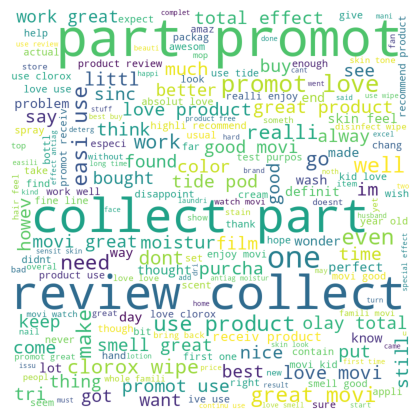

In [334]:
from wordcloud import WordCloud
# Initialize an empty string to store all keywords
comment_words = ''

# Iterate through the 'text' column
for val in df['text']:
    # Split the sentence into words (tokens) assuming the text is already clean
    tokens = val.split()  # This will split by whitespace

    # Join the tokens back into a single string and add to comment_words
    comment_words += " ".join(tokens) + " "

# Generate the word cloud using the concatenated string of tokens
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=None,  # Stopwords are assumed to be already removed
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

La nube de palabras revela que las palabras 'part', 'review', 'collect' y 'promot' son las más comunes. Al revisar las entradas individualmente, se puede observar la frase "This review was collected as part of a promotion." en una cantidad significativa de reseñas. Este texto es agregado automáticamente por el sitio donde se publican las reseñas y solo introduce ruido. Para resolver esto, se eliminará la cadena 'review collect part promot' de todas las reseñas.

In [335]:
# Remove the substring 'review collect part promot' from each entry
df['text'] = df['text'].str.replace(r'review collect part promot', '', case=False, regex=True)

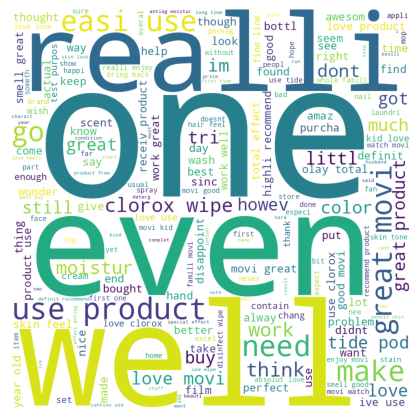

In [336]:
# Initialize an empty string to store all keywords
comment_words = ''

# Iterate through the 'text' column
for val in df['text']:
    # Split the sentence into words (tokens) assuming the text is already clean
    tokens = val.split()  # This will split by whitespace

    # Join the tokens back into a single string and add to comment_words
    comment_words += " ".join(tokens) + " "

# Generate the word cloud using the concatenated string of tokens
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=None,  # Stopwords are assumed to be already removed
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

Al eliminar las palabras automáticamente agregadas a las reseñas, es posible ver una mayor variedad de palabras en la nube. Entre estas, las más comunes son 'well', 'one', 'even', 'use' y 'product'. Esto es de esperarse, ya que varias de las palabras mencionadas no son clasificadas como stopwords en sí, pero son de las palabras más comunes en el idioma inglés ('one', por ejemplo, siendo el rango 31 según el Oxford English Corpus).


<Figure size 1000x500 with 0 Axes>

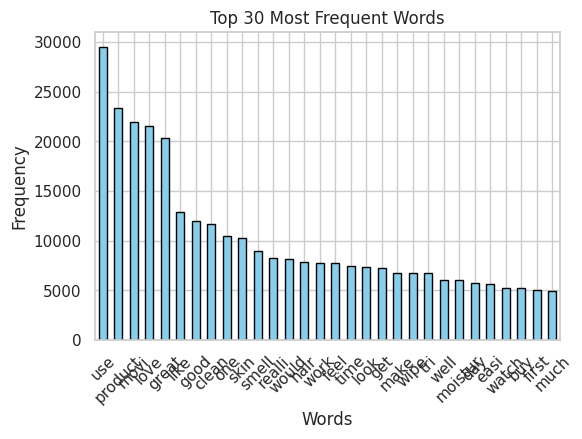

In [337]:
all_reviews_text = " ".join(review for review in df['text'])

# Calculate word frequencies
word_counts = Counter(all_reviews_text.split())

# Create a DataFrame with the word frequencies
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot a histogram of the top 30 most frequent words
plt.figure(figsize=(10, 5))
word_freq_df.head(30).plot(kind='bar', x='Word', y='Frequency', legend=False, color='skyblue', edgecolor='black')
plt.title('Top 30 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Word Cloud de Columna Title-->**

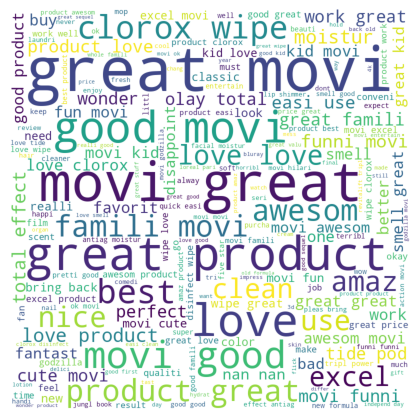

In [338]:
# Initialize an empty string to store all keywords
comment_words = ''

# Iterate through the 'keyword' column and concatenate the keywords into a single string
for val in df['title']:
    comment_words += (val + " ")

# Generate the word cloud using the concatenated string of keywords
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=None,  # Adjust this if you have a list of stopwords to exclude
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

Como se mencionó en la explicación de las variables, la columna `title` puede ser muy útil para determinar el sentimiento de la reseña, lo cual es evidente por la variedad de palabras con carga emocional que aparecen en la nube de palabras. Esto no es tan evidente en la columna `text`, por lo que el título de la reseña será útil para proporcionar contexto y ayudar a determinar el sentimiento general de la reseña.

<Figure size 1000x500 with 0 Axes>

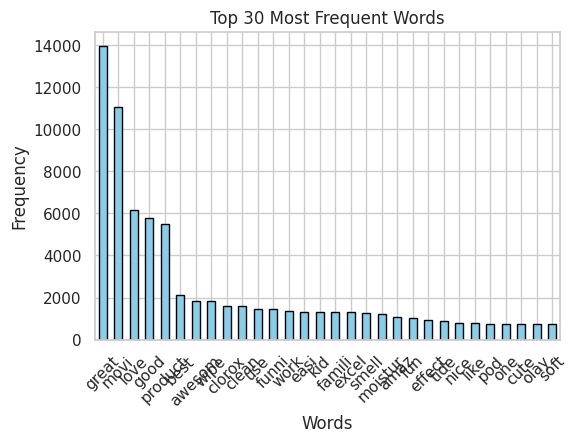

In [339]:
all_reviews_text = " ".join(review for review in df['title'])

# Calculate word frequencies
word_counts = Counter(all_reviews_text.split())

# Create a DataFrame with the word frequencies
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot a histogram of the top 30 most frequent words
plt.figure(figsize=(10, 5))
word_freq_df.head(30).plot(kind='bar', x='Word', y='Frequency', legend=False, color='skyblue', edgecolor='black')
plt.title('Top 30 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## **(4) Sentiment Analysis 😖 🔎**

### **(1) Clasificación de Palabras Según Sentimiento**

In [340]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [341]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [342]:
sia = SentimentIntensityAnalyzer()

**Observaciones 💡 -->**

> - Como se puede observar en el código anterior, así como en el laboratorio previo y en los ejercicios anteriores, se implementará la librería NLTK para la clasificación de palabras y reseñas en base a sentimiento, utilizando específicamente el módulo `SentimentIntensityAnalyzer`.

> - Nótese que se carga un dataset llamado `vader_lexicon`. VADER (Valence Aware Dictionary and sEntiment Reasoner) es una herramienta de análisis de sentimientos basada en un diccionario y reglas, diseñada específicamente para captar los sentimientos expresados en las redes sociales, aunque también funciona bien con textos de otros dominios. Al lector que le interese conocer más detalladamente su funcionamiento, por favor ingresar al siguiente enlace --> https://github.com/cjhutto/vaderSentiment

### **(2) Clasificación de Reseñas Según Sentimiento**

In [343]:
def classify_sentiment(text):
    # Get the sentiment scores for the input text
    score = sia.polarity_scores(text)

    # Check the compound score to classify the sentiment
    if score['compound'] >= 0.05:
        sentiment = 'positive'
    elif score['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    # Return both the sentiment classification and the neg score
    return sentiment, score['compound'], score['neg']

In [344]:
# Apply the sentiment analysis to both 'text' and 'title' columns
df['text_sentiment'] = df['text'].dropna().apply(lambda x: classify_sentiment(x))
df['title_sentiment'] = df['title'].dropna().apply(lambda x: classify_sentiment(x))

# Split the sentiment results into separate columns
df[['text_sentiment_label', 'text_compound', 'text_neg']] = pd.DataFrame(df['text_sentiment'].tolist(), index=df.index)
df[['title_sentiment_label', 'title_compound', 'title_neg']] = pd.DataFrame(df['title_sentiment'].tolist(), index=df.index)

# Drop the intermediate columns if no longer needed
df.drop(columns=['text_sentiment', 'title_sentiment'], inplace=True)

In [345]:
df.head()

,text,title,recommend,purchased,username,id,upc,brand,product_name,text_sentiment_label,text_compound,text_neg,title_sentiment_label,title_compound,title_neg
0,love album good hip hop side current pop sound...,awesom,NaN,NaN,Joshua,NaN,6.02537E+11,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),positive,0.7964,0.000,neutral,0.0000,0.0
1,good flavor,good,NaN,True,Dorothy W,100209113.0,73416000391,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,positive,0.4404,0.000,positive,0.4404,0.0
3,read review look buy one coupl lubric ultim di...,disappoint,False,False,Rebecca,113026909.0,67981934427,K-Y,K-Y Love Sensuality Pleasure Gel,negative,-0.6302,0.184,negative,-0.4019,1.0
4,husband bought gel us gel caus irrit felt like...,irrit,False,False,Walker557,171267657.0,67981934427,K-Y,K-Y Love Sensuality Pleasure Gel,positive,0.1002,0.127,neutral,0.0000,0.0
5,boyfriend bought spice thing bedroom highli di...,worth,False,False,Samantha,149773828.0,67981934427,K-Y,K-Y Love Sensuality Pleasure Gel,positive,0.3612,0.104,positive,0.2263,0.0


**Top 10 productos de mejor calidad dado su reseña -->**

In [346]:
def sentiment_score(row):
    # Combine text and title sentiment scores
    return row['text_compound'] + row['title_compound']

df['sentiment_score'] = df.apply(sentiment_score, axis=1)

# Average sentiment score per product
df.groupby('product_name')['sentiment_score'].mean().nlargest(10)

,sentiment_score
product_name,
"Yardley Of London Bath and Shower Gel, Exfoliating Sea Minerals",1.676600
"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",1.620200
JNH Lifestyles Goldstar 3 Person FAR Infrared Sauna,1.611300
"The Honest Company Bar Soap, Lavender",1.591425
Essex Pendulum Wall Clock Black - Timekeeper174,1.571700
Justin Bieber - Under The Mistletoe (vinyl),1.566800
Physician's Formula Cheek Palette Cream-to-Powder Blush Rose Palette,1.502700
Dermalogica Environmental Control Deodorant,1.500025
Ceramic Table Lamp - 26.5h - Navy Blue/beige,1.479350


**Observaciones 💡 -->**

> - Hay una gran variedad de productos de distintas categorías entre los mejores 10, por lo que no se puede inferir que exista alguna categoría de producto con puntuaciones más positivas basándose solamente en este resultado.
> - Los puntajes obtenidos en los mejores diez productos son relativamente altos, indicando una fuerte carga positiva en el contenido.

**Top 10 productos de mejor calidad dado se reseña -->**

In [347]:
df.groupby('product_name')['sentiment_score'].mean().nsmallest(10)

,sentiment_score
product_name,
Pocket Watch Wall Clock Distressed Black - Yosemite Home Decor174,-0.7506
Horizon174 Organic Unsalted Butter - 1lbs,-0.7184
"Heinz Tomato Ketchup, 38oz",-0.7003
Cupcake Wall Clock Green/pink - Trend Lab174,-0.6179
Udi's Pepperoni Pizza,-0.5478
Gone Fishing Titanized Fisherman Pliers with Braid Cutter,-0.4787
"Black Opal Total Coverage Spot & Scar Eraser, Hazelnut",-0.3612
Dremel VC490 Velocity Universal Panel Cutting Blade,-0.2960
Peak Long Life Antifreeze Coolant 1-Gal.,-0.2755


**Observaciones 💡 -->**

> - De nuevo, hay una gran variedad de productos de distintas categorías entre los peores 10, por lo que no se puede inferir que exista alguna categoría de producto con puntuaciones más negativas basándose solamente en este resultado.
> - Existe una diferencia considerable entre el producto con puntuación más negativa en comparación con el décimo producto con peor puntuación. Esto indica que, en general, cuando un producto obtiene reseñas negativas, las reseñas no serán tan negativas o habrán reseñas mixtas, pero, en el caso de los 5 o 6 peores productos, las reseñas son extremadamente negativas en general.

**Usuarios que dan la mayor cantidad de reseñas a distintos productos -->**

In [348]:
df.groupby('username')['upc'].nunique().nlargest(10)

,upc
username,
Anonymous,118
Mike,27
Chris,25
Sandy,23
Lisa,22
John,21
Rick,21
Mimi,19
Angie,18


**Observaciones 💡 -->**

> - No es posible atribuir reseñas a ciertas personas específicas ya que los nombres de usuarios están compuestos en su mayoría por aliases o solamente por el primer nombre de la persona, y pueden haber múltiples usuarios que se hagan llamar por el mismo nombre. Además, no existen otras variables en el conjunto de datos que permitan diferencias entre estos usuarios.
> - Aún así, es posible ver que reseñas de usuarios anónimos son muy comunes entre todos los productos.
> - El alias 'Mike' es el nombre con la mayor cantidad de reseñas a distintos productos, seguido por 'Chris', 'Sandy' y 'Lisa'.

**Usuarios que más reseñas negativas y positivas dan en promedio. -->**

In [349]:
user_sentiment_scores = df.groupby('username')['sentiment_score'].mean()

**Reseñas Positivas**

In [350]:
user_sentiment_scores.nlargest(10)

,sentiment_score
username,
DrySKinGirl,1.9281
Dryskingirl,1.9281
blondiy0212,1.9159
Frankrizzo1,1.9136
StephhMariee1,1.9074
ugi999,1.9068
ISLANDGIRL13,1.8993
pbeech,1.8976
LYZA,1.8965


**Reseñas Negativas**

In [351]:
user_sentiment_scores.nsmallest(10)

,sentiment_score
username,
fannicienta,-1.6758
Jules44d,-1.6520
ByP,-1.5477
Native415,-1.5184
Reed,-1.4982
Gemma,-1.4860
ACG1,-1.4757
Wolvarine,-1.4664
Tracya,-1.4540


**Observaciones 💡 -->**

- El usuario con las reseñas más positivas en promedio aparece duplicado bajo dos alias que difieren solo en la capitalización de los caracteres, lo que probablemente se deba a un error humano al ingresar el alias al crear las reseñas. Además, ambas reseñas tienen la misma puntuación, lo que indica que este usuario realizó pocas reseñas extremadamente positivas y no volvió a publicar más.

- Los usuarios con las reseñas más negativas en promedio no presentan detalles o características destacables.

- Para obtener más información sobre estos resultados, sería valioso investigar el contenido de las reseñas de estos usuarios, así como la cantidad de reseñas que han realizado y en qué productos las publicaron.


**Productores que tienen productos de mejor calidad -->**

In [352]:
df.groupby('brand')['sentiment_score'].mean().nlargest(10)

,sentiment_score
brand,
Yardley,1.676600
Carson-Dellosa Publishing,1.620200
JNH Lifestyles,1.611300
Timekeeper,1.571700
Bodycology,1.468500
Jake And The Neverland Pirates,1.427400
Weleda,1.391237
Noosa,1.355300
bareMinerals,1.349650


**Observaciones 💡 -->**

> - Hay productores con productos de mejor calidad en base al análisis de sentimientos que poseen productos que también están entre los 10 de mayor calidad.

**Productores que tienen productos de mejor calidad -->**

In [353]:
df.groupby('brand')['sentiment_score'].mean().nsmallest(10)

,sentiment_score
brand,
Yosemite Home Decor,-0.7506
Horizon,-0.7184
Heinz,-0.7003
Udi's,-0.5478
Gone Fishing,-0.4787
Black Opal,-0.3612
Dremel,-0.2960
Peak,-0.2755
Swann,-0.2109


**Observaciones 💡 -->**

> - Hay productores con productos de menor calidad en base al análisis de sentimientos que poseen productos que también están entre los 10 de menor calidad.

### **(3) Propuestas de mejoras para el productor con la mayor cantidad de reseñas negativas**

Antes de continuar, es necesario saber cuál es el productor con la mayor cantidad de reseñas negativas. Las respuestas anteriores se basan en el promedio de la puntuación de las reseñas, no en la cantidad. Gracias a esto, es posible que el productor con las reseñas más negativas en promedio no sea el productor con la mayor cantidad de reseñas negativas.

In [354]:
# Get only the negative reviews
negative_reviews = df[df['text_sentiment_label'] == 'negative']

# Count the number of negative reviews per manufacturer
negative_review_counts = negative_reviews.groupby('brand').size()

# Get the manufacturer with the most negative reviews
negative_review_counts.idxmax()

'Tide'

Tide es uno de los productores con la mayor cantidad de reseñas en general, por lo que también tiene sentido que tenga la mayor cantidad de reseñas negativas. Cabe resaltar que podrían haber más acercamientos para determinar el peor productor, pero, para el ámbito de este trabajo, se procederá a utilizar 'Tide' gracias a su espacio muestral considerable.

**Palabras frecuentes en las reseñas negativas**

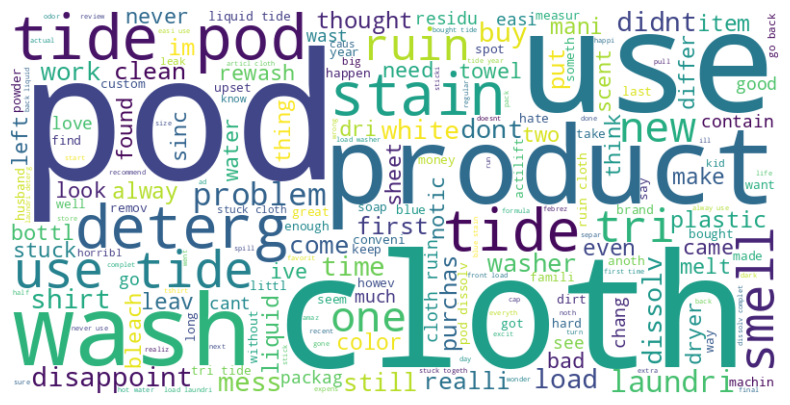

In [355]:
manufacturer_reviews = negative_reviews[negative_reviews['brand'] == 'Tide']

# Concatenate all review texts for word cloud generation
all_reviews_text = " ".join(review for review in manufacturer_reviews['text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

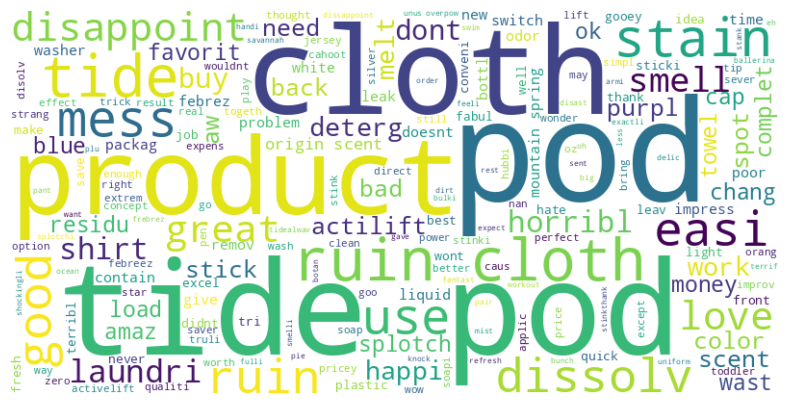

In [356]:
# Concatenate all review texts for word cloud generation
all_reviews_text = " ".join(review for review in manufacturer_reviews['title'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 1000x500 with 0 Axes>

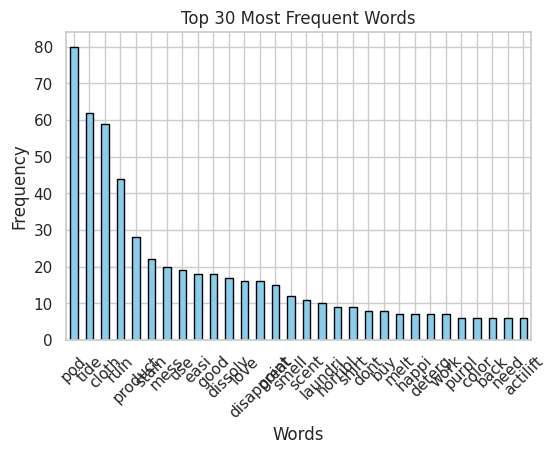

In [357]:
# Calculate word frequencies
word_counts = Counter(all_reviews_text.split())

# Create a DataFrame with the word frequencies
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot a histogram of the top 30 most frequent words
plt.figure(figsize=(10, 5))
word_freq_df.head(30).plot(kind='bar', x='Word', y='Frequency', legend=False, color='skyblue', edgecolor='black')
plt.title('Top 30 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Observaciones 💡 -->**

- A partir de la frecuencia y la nube de palabras, es posible identificar algunas características comunes en las reseñas. Palabras como 'mess', 'ruin', 'smell' y 'stain' sugieren que los productos de Tide podrían estar arruinando la ropa de los usuarios, generando mal olor, fallando en quitar manchas o incluso creando nuevas. Estas características son lo opuesto a lo que se espera de este tipo de productos, lo cual se refleja en la frecuencia de términos como 'problem', 'disappoint', 'never' y 'stuck'.

- Como primera recomendación, sería importante asegurar que el aroma de los productos sea agradable y que perdure sin degradarse rápidamente. Además, se debe garantizar la capacidad de los productos para eliminar eficazmente las manchas de la ropa.

- También sería valioso revisar la calidad e integridad de los productos, dado el uso frecuente de palabras como 'ruin', 'stuck' y 'mess' en las reseñas. Esto podría indicar que los productos están dañando la ropa de los clientes, lo cual podría deberse a diversas razones.

- Finalmente, es crucial mantener un nivel general de calidad en los productos. Aunque esto pueda parecer redundante, es fundamental tener en cuenta que mejorar los aspectos mencionados podría afectar negativamente otras características, como el tiempo de disolución de cada pod o la capacidad para eliminar manchas.
